In [1]:
import os
if not os.path.exists("/kaggle/tmp"):
    os.mkdir("/kaggle/tmp")
!cd /kaggle/tmp
!pip install git+https://github.com/sunsmarterjie/yolov12
from ultralytics import YOLO
# from ultralytics.data.converter import convert_coco

model = YOLO('yolov12n.yaml')
model.info() # should print non-zero FLOPs if working
!ls /kaggle/tmp
print("done no err")

  Cloning https://github.com/sunsmarterjie/yolov12 to /tmp/pip-req-build-gtxas25z
  Running command git clone --filter=blob:none --quiet https://github.com/sunsmarterjie/yolov12 /tmp/pip-req-build-gtxas25z
  Resolved https://github.com/sunsmarterjie/yolov12 to commit 3bca22b336e96cfdabfec4c062b84eef210e9563
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.63-py3-none-any.whl size=910567 sha256=c98634d4d9f931667bbb2e72f417178ff8319e66d75140b62c8490a12e34c722
  Stored in directory: /tmp/pip-ephem-wheel-cache-x5wijj7y/wheels/62/15/c5/be8a9b7c7dd2b3beb193975080873108d2eb9bf23a6e7a67eb
Successfully built ultralytics
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For he

In [2]:

# convert_coco(labels_dir = "/kaggle/input/datasets/awsaf49/coco-2017-dataset/coco2017/annotations/captions_train2017.json", 
#             save_dir = "/kaggle/working/labels_ready_for_training/")

In [3]:
#validate the model on the coco dataset. mAp with iou 50 = 0.555, average mAP of mAP of
#ious 50-95 = 0.402
# model.val(data="coco.yaml")

# model.predict(["/kaggle/input/two-images-of-racecars/two_images_of_racecars/racecars0.jpeg"])


0: 480x640 (no detections), 154.0ms
Speed: 13.0ms preprocess, 154.0ms inference, 7.6ms postprocess per image at shape (1, 3, 480, 640)


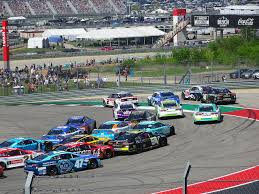

In [4]:
res = model.predict(["/kaggle/input/two-images-of-racecars/two_images_of_racecars/racecars0.jpeg"])
for result in res:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen

In [5]:
# model.val(data="coco128.yaml")

In [6]:
# it WORKS
# results = model.train(data="/kaggle/input/not-default-folder/coco_not_default_folder.yaml", 
#                       epochs=100, imgsz=640)

# results = model.train(data="coco128.yaml", 
#                       epochs=1000, imgsz=640, patience=0)

In [7]:
# model.val(data="coco128.yaml")

In [8]:
# results = model.train(data="coco.yaml", epochs=100, imgsz=640)



In [9]:
# model #prints the structure of the model
